In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import scipy.spatial.distance as dist
from itertools import product
import sys

print('Modules imported')


Modules imported


Algorithm Computation: 
Get all photos, sort, and get Average face

In [2]:
images={}
width = 300
height = 400
num_faces = 0  #M
for image_str in os.listdir('pics'):
    num_faces+=1
    name_arr = image_str.split('-')
    name = name_arr[0] +' ' + name_arr[1]
    if images.get(name,0) == 0:
        images[name] = []
    img = Image.open('pics/'+image_str)
    new_img = img.resize((width,height))    #resize all pics to same size
    images[name].append(new_img.convert('L'))
        
sum_face = np.zeros((height, width))
for image in images:
    num_of_imgs = 0
    for individual in images[image]:
        num_of_imgs +=1
        sum_face+=np.array(individual)
avg_face=sum_face/num_faces

4


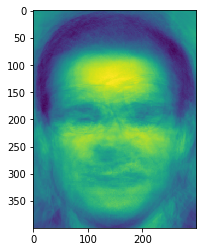

In [3]:
print(num_of_imgs)
plt.imshow(avg_face)
plt.show()

Find difference between each face and average face

In [4]:
phi_i = np.empty((num_faces,height*width))
face_idx = 0
for image in images:
    for orig_face in images[image]:   #orig_face is Gamma
        phi_i[face_idx] = (np.array(orig_face)-avg_face).flatten()
        face_idx+=1
print(phi_i.shape)

(40, 120000)


Compute Covariance

In [5]:
C = phi_i.dot(phi_i.T)
print(C.shape)

(40, 40)


Find eigens

In [6]:
eigvals, eigvects = np.linalg.eigh(C)
#Normalize
eigvals = eigvals/np.linalg.norm(eigvals)
eigvects = eigvects/np.linalg.norm(eigvects)
print(eigvects.shape)

idx_sort = eigvals.argsort()[::-1]
print(idx_sort)
eigvects = eigvects[:,idx_sort]
print(eigvects.shape)

(40, 40)
[39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16
 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
(40, 40)


In [7]:
K=9
#K=(num_faces//5)
evals_K = eigvals[:K]
evects_K = eigvects[:K,:]
print(evals_K.shape)
print(evects_K.shape)


(9,)
(9, 40)


In [8]:
print(evects_K.shape)
evects_K = evects_K.dot(phi_i)
for i in range(K):
    evects_K[i,:] = evects_K[i,:]/np.linalg.norm(evects_K[i,:])
print(evects_K.shape)

(9, 40)
(9, 120000)


In [9]:
w = evects_K.dot(phi_i.T)
print(w)
print(w.shape)


[[-1.01995860e+03  2.91653779e+02  2.36422900e+03  1.19800915e+03
   4.40204184e+03  7.60829357e+03  2.77674322e+03  4.51773238e+03
  -1.95795163e+03  3.80192360e+03 -1.49114648e+03  1.71176219e+03
  -3.03925119e+02 -3.85954350e+03 -4.67111283e+03  5.80408239e+03
   2.16525263e+03 -2.88085583e+03 -4.78960070e+03 -6.78140551e+03
  -1.93780912e+03 -5.26585359e+03  5.98694320e+03  5.35643712e+03
   5.57032503e+03  2.92031284e+03 -2.89682455e+03 -4.38390546e+03
  -4.27706712e+02 -7.61441532e+03  6.74351199e+02 -3.40813718e+03
   4.45110334e+02  5.95894920e+01 -8.91484119e+00 -7.76634868e+02
  -1.24721876e+03 -4.78320709e+03 -2.20461206e+03  5.05594678e+03]
 [ 2.42080024e+03 -9.35759121e+02  4.18480055e+03  4.12517679e+03
   5.47769013e+02 -3.36077053e+02  2.88110583e+03 -3.18876220e+03
  -4.49741539e+03 -9.76051590e+03 -1.03215187e+04 -2.24165968e+03
   1.95057331e+03 -3.42370508e+03 -4.19345467e+03  3.55749015e+03
  -9.86367811e+03  1.04691143e+03  3.83326240e+03  3.16904535e+03
  -7.8853

Face Recognition

In [10]:
test_faces = {}
for image_str in os.listdir('test'):
    name_arr = image_str.split('-')
    name = name_arr[0] +' ' + name_arr[1]
    img = Image.open('test/'+image_str)
    img = img.resize((300,400)).convert('L')
    test_faces[name] = img.convert('L')
    
print(test_faces)

{'alex pic': <PIL.Image.Image image mode=L size=300x400 at 0x1E5D5549E08>, 'leonardo dicaprio': <PIL.Image.Image image mode=L size=300x400 at 0x1E5D5D09788>, 'matt damon': <PIL.Image.Image image mode=L size=300x400 at 0x1E5D5D099C8>, 'red apple': <PIL.Image.Image image mode=L size=300x400 at 0x1E5D5D09148>, 'toilet pic': <PIL.Image.Image image mode=L size=300x400 at 0x1E5D5D09E88>, 'will smith': <PIL.Image.Image image mode=L size=300x400 at 0x1E5D5D0F2C8>}


30
8792.017745070385


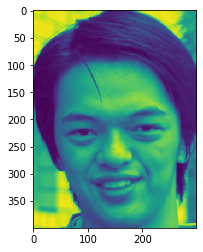

alex pic
We classify this as a face
---
14
7616.470850632806


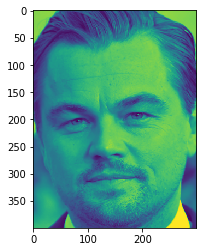

leonardo dicaprio
We classify this as a face
---
10
5301.91800784836


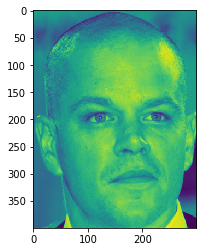

matt damon
We classify this as a face
---
7
17840.55425150299


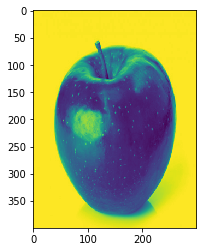

red apple
We classify this as a face
---
10
30472.70486297972


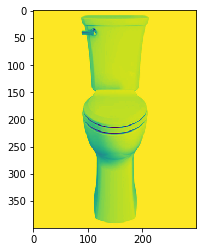

toilet pic
We classify this as not a face
---
12
8468.619218099155


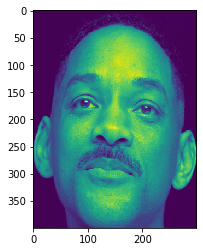

will smith
We classify this as a face
---


In [11]:
##DISREGARD
phi = np.empty((num_faces,height*width))
for faces in test_faces:
    phi = (test_faces[faces] - avg_face).reshape(width*height,1)
    W = evects_K.dot(phi)
    omega_norms = dist.cdist(w.T,W.T, 'euclidean')
    e = np.argmin(omega_norms)
    print(e)
    print(np.min(omega_norms))
    plt.imshow(test_faces[faces])
    plt.show()
        
    idx = np.argmin(omega_norms)
    detection_threshold = 20000
    recognition_threshold = 7000
    print(faces)
    if omega_norms[idx] <detection_threshold:
        print("We classify this as a face")
#         if avg_norms[idx]<recognition_threshold:
#             print("We classify this as", list(test_faces)[idx])
#         else:
#             print("We classify this as an unknown person")
    else:
        print("We classify this as not a face")
    print('---')

In [12]:
def facial_detection(faces):
    phi = np.empty((num_faces,height*width))

    phi = (faces - avg_face).reshape(width*height,1)
    W = evects_K.dot(phi)
    omega_norms = dist.cdist(w.T,W.T, 'euclidean')
    e = np.argmin(omega_norms)
    print(e)
    print(np.min(omega_norms))
    plt.imshow(faces)
    plt.show()

    idx = np.argmin(omega_norms)
    detection_threshold = 8800
    recognition_threshold = 7000
    if omega_norms[idx] <detection_threshold:
        print("We classify this as a face")
    #         if avg_norms[idx]<recognition_threshold:
    #             print("We classify this as", list(test_faces)[idx])
    #         else:
    #             print("We classify this as an unknown person")
        return True
    else:
        print("We classify this as not a face")
        return False

30
8792.017745070385


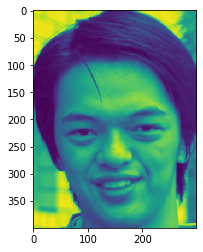

We classify this as a face
14
7616.470850632806


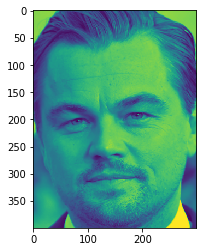

We classify this as a face
10
5301.91800784836


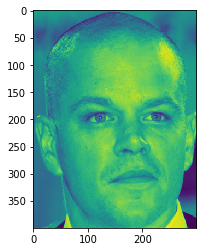

We classify this as a face
7
17840.55425150299


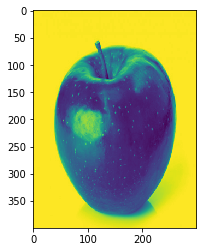

We classify this as not a face
10
30472.70486297972


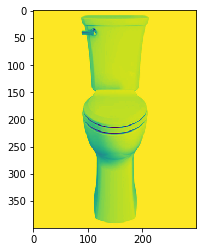

We classify this as not a face
12
8468.619218099155


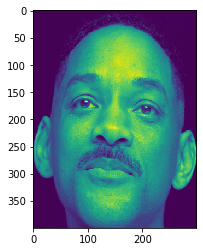

We classify this as a face


In [13]:
for faces in test_faces:
    facial_detection(test_faces[faces])

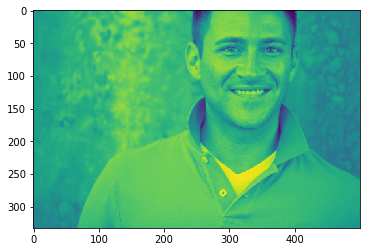

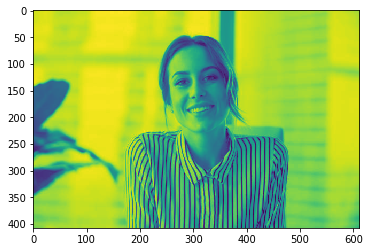

In [14]:
current_dir = 'full_images'
full_img = {}
for image_str in os.listdir(current_dir):
    img = Image.open(current_dir+'/'+image_str)
    full_img[image_str]=img.convert('L')
    plt.imshow(full_img[image_str])
    plt.show()


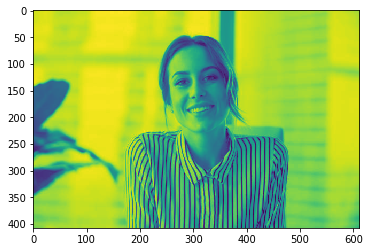

10
25728.791117797282


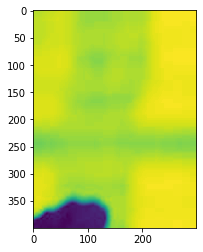

We classify this as not a face
10
22355.61475044401


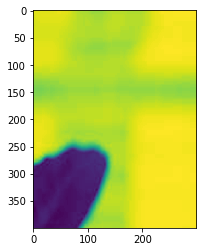

We classify this as not a face
23
19525.392304437755


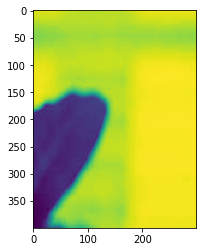

We classify this as not a face
23
18097.373237739426


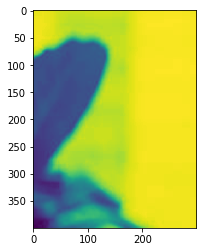

We classify this as not a face
10
15029.379273800976


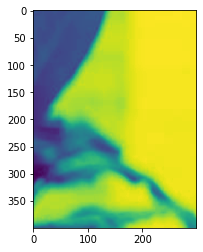

We classify this as not a face
23
17705.54713922168


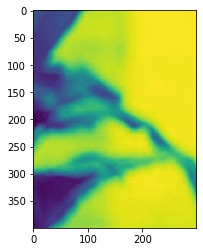

We classify this as not a face
10
27031.491264450582


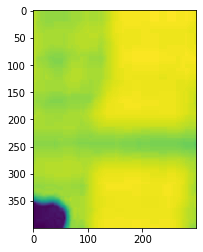

We classify this as not a face
10
25440.48561612193


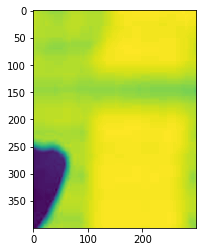

We classify this as not a face
10
24691.584135262867


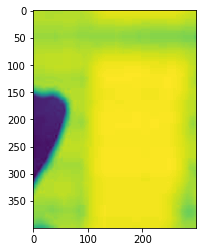

We classify this as not a face
10
24611.927273882353


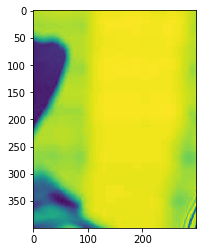

We classify this as not a face
10
22878.434574485327


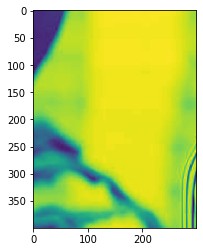

We classify this as not a face
10
21853.60656112142


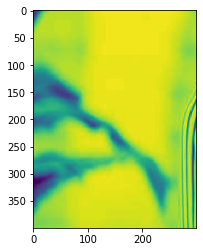

We classify this as not a face
10
28230.224987521004


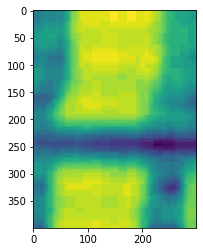

We classify this as not a face
10
28221.076035479462


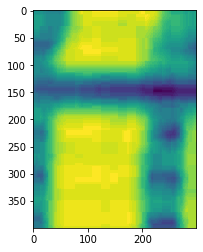

We classify this as not a face
10
26761.12763671121


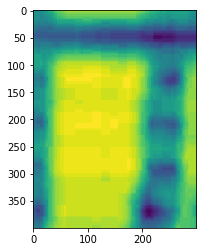

We classify this as not a face
10
28606.89125860639


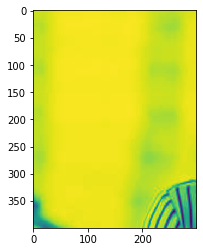

We classify this as not a face
10
25779.709327321816


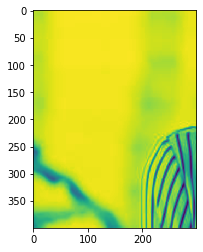

We classify this as not a face
10
24148.20791602319


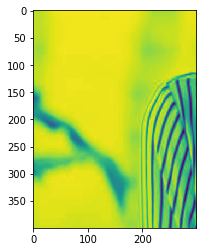

We classify this as not a face
10
28192.06291027512


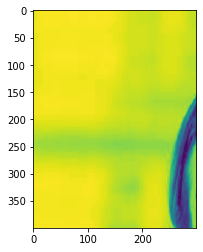

We classify this as not a face
10
26966.54586664103


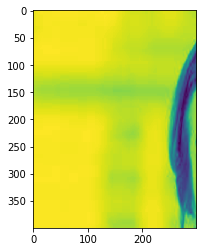

We classify this as not a face
10
23792.176802036396


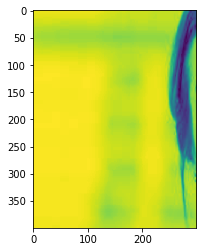

We classify this as not a face
10
24894.504366075762


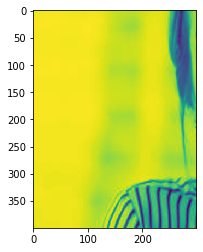

We classify this as not a face
10
22991.559480448555


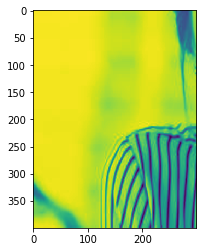

We classify this as not a face
7
17004.471571643244


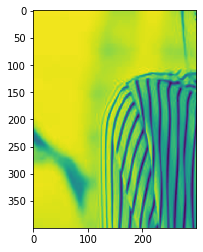

We classify this as not a face
7
22003.13756673897


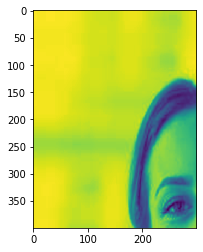

We classify this as not a face
10
19047.78322906603


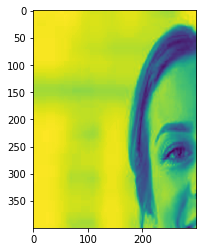

We classify this as not a face
10
18535.91709774776


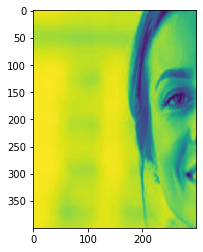

We classify this as not a face
10
15911.992169615087


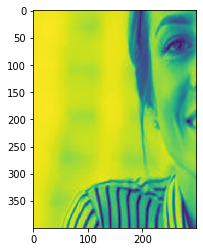

We classify this as not a face
10
16707.45523747206


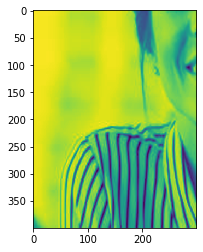

We classify this as not a face
7
11522.2805459632


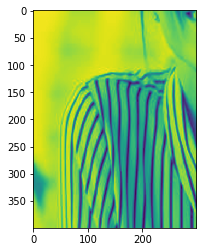

We classify this as not a face
7
14713.407029951139


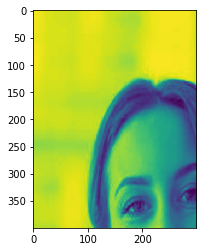

We classify this as not a face
10
14664.51164967335


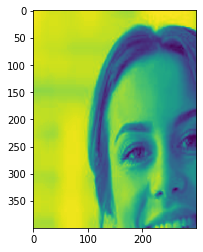

We classify this as not a face
10
14716.533046311122


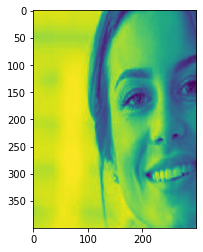

We classify this as not a face
10
10846.79435977927


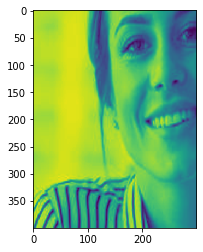

We classify this as not a face
10
11408.131336762513


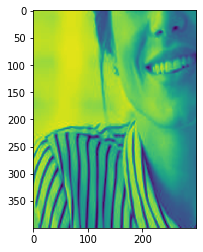

We classify this as not a face
7
10428.736021172203


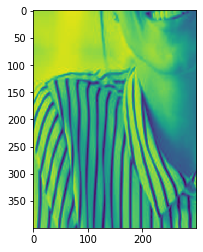

We classify this as not a face
7
5971.745113920984


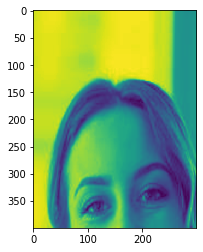

We classify this as a face
6
8150.013814082197


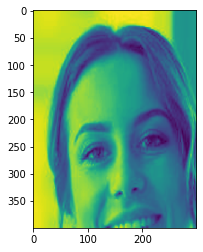

We classify this as a face
14
11406.586991676048


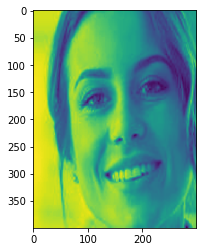

We classify this as not a face
34
8984.620007251044


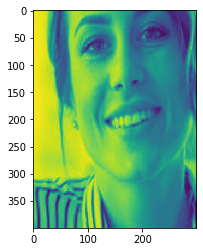

We classify this as not a face
14
10098.068007289854


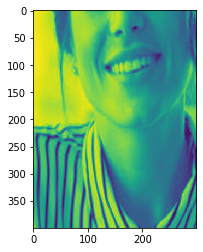

We classify this as not a face
4
6550.021782455406


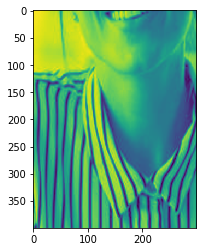

We classify this as a face
7
13746.704990303126


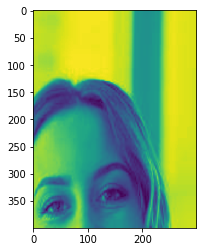

We classify this as not a face
23
11574.130927636083


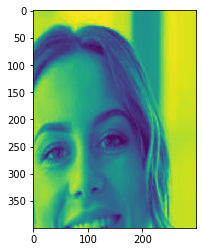

We classify this as not a face
23
10862.267250187604


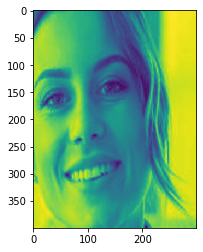

We classify this as not a face
23
8647.139090228236


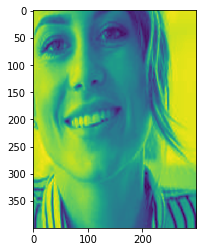

We classify this as a face
4
9021.944600395633


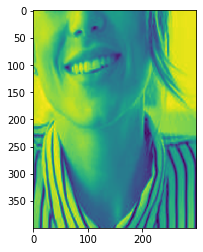

We classify this as not a face
4
6496.753224914579


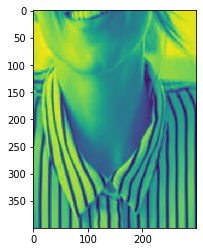

We classify this as a face
23
15101.884029739005


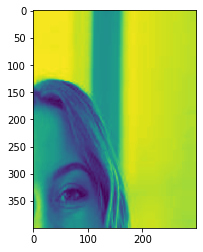

We classify this as not a face
23
13133.60882344407


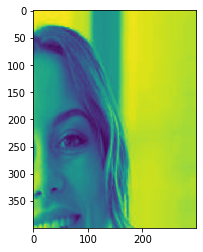

We classify this as not a face
23
12244.375162645705


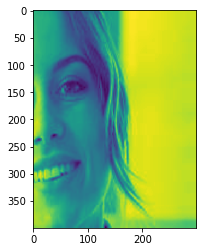

We classify this as not a face
23
10886.160986034782


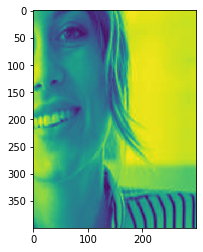

We classify this as not a face
4
10912.855816932797


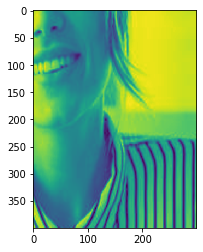

We classify this as not a face
4
8594.182700799476


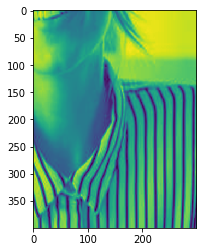

We classify this as a face
10
16929.693046271255


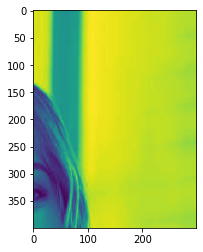

We classify this as not a face
8
15131.8055951671


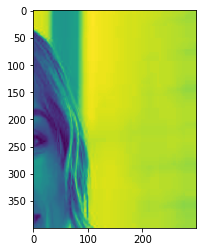

We classify this as not a face
10
13807.799856868905


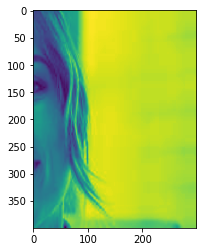

We classify this as not a face
8
13084.118032122682


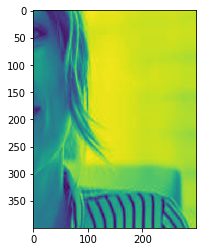

We classify this as not a face
24
12605.86204881273


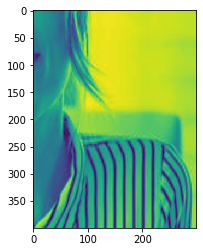

We classify this as not a face
4
9281.31779846256


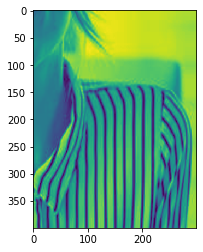

We classify this as not a face
10
21586.879165818333


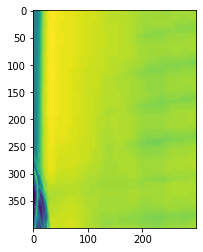

We classify this as not a face
10
20885.06255421116


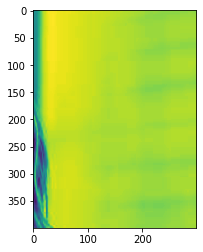

We classify this as not a face
10
20449.741308474713


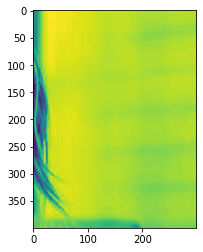

We classify this as not a face
10
16077.514277087252


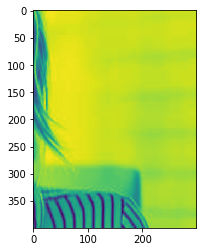

We classify this as not a face
23
13600.78237866912


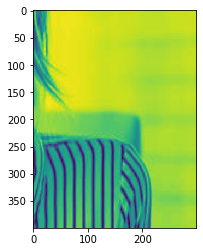

We classify this as not a face
23
12259.781886333429


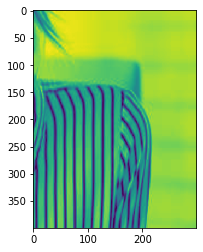

We classify this as not a face
10
21795.07102887488


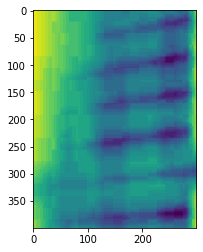

We classify this as not a face
10
21358.593723316135


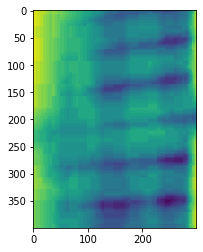

We classify this as not a face
10
20960.89349069867


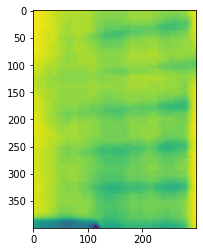

We classify this as not a face
10
18276.272961143597


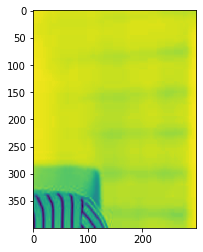

We classify this as not a face
23
16016.298529823824


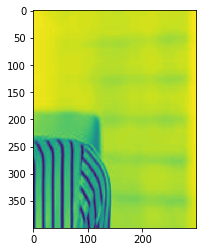

We classify this as not a face
23
12855.094354534784


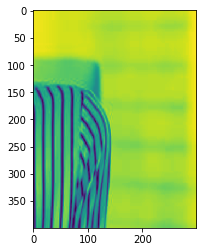

We classify this as not a face
10
22259.102588981754


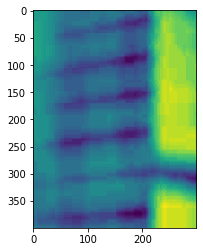

We classify this as not a face
10
22030.714332070627


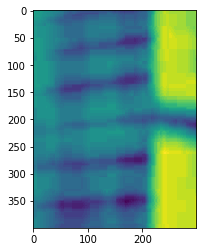

We classify this as not a face
10
21636.96237048319


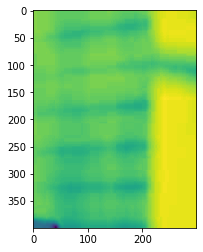

We classify this as not a face
10
20782.6327011435


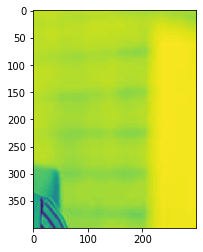

We classify this as not a face
10
19388.35966248685


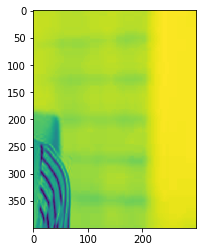

We classify this as not a face
10
17614.605094045513


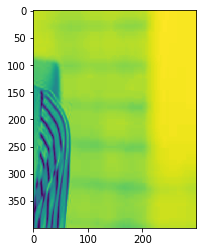

We classify this as not a face


In [15]:
img = full_img['one_woman.jpg']
plt.imshow(img)
plt.show()

img_w = 150
img_h = 150
boxes = []
for i in range(0,img.width,int(img_w/4)):
    for j in range(0,img.height//2,int(img_h/4)):
        right = min((i+img_w),img.width)
        upper = j
        left = i
        lower = min((j + img_h),img.height)
        if right - left < img_w or lower-upper < img_h:
            continue
        bbox = (left,upper,right,lower)
        crop = img.crop(bbox).resize((width,height)).convert('L')
        #print(bbox)
#         plt.imshow(crop)
#         plt.show()
        if facial_detection(crop):
            boxes.append([left,right,upper,lower])

In [16]:
def should_merge(box1, box2,close_dist):
    a = (box1[0], box1[2]), (box1[1], box1[3])
    b = (box2[0], box2[2]), (box2[1], box2[3])

    if any(abs(a_v - b_v) <= close_dist for i in range(2) for a_v, b_v in product(a[i], b[i])):
        return True, [min(*a[0], *b[0]), min(*a[1], *b[1]), max(*a[0], *b[0]), max(*a[1], *b[1])]

    return False, None

def merge_box(boxes, close_dist = 100):
    for i, box1 in enumerate(boxes):
        for j, box2 in enumerate(boxes[i + 1:]):
            is_merge, new_box = should_merge(box1, box2,close_dist)
            if is_merge:
                boxes[i] = None
                boxes[j] = new_box
                break

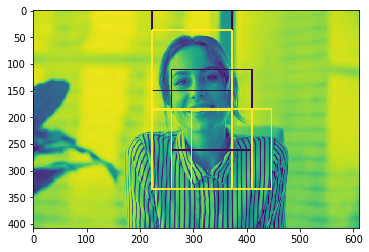

In [17]:
temp_img = img
for i in range(len(boxes)):
    if(boxes[i] == None):
        continue
    start_point = (boxes[i][0], boxes[i][2]) 

    # represents the bottom right corner of rectangle 
    end_point = (boxes[i][1], boxes[i][3]) 

    # Blue color in BGR 
    color = (255*(i%3), 255*(i+1%3),255*(i+2%3)) 

    # Line thickness of 2 px 
    thickness = 2

    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    np_img = np.asarray(temp_img)
    image = cv2.rectangle(np_img, start_point, end_point, color, thickness) 
    temp_img = Image.fromarray(image)
plt.imshow(image)
plt.show()


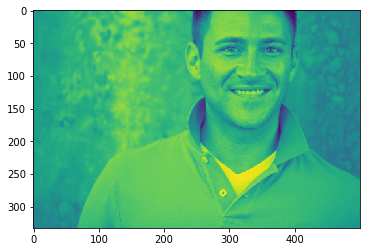

10
8984.61541832658


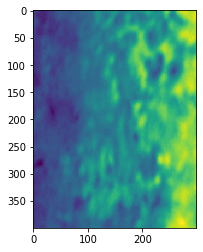

We classify this as not a face
10
9258.176567858893


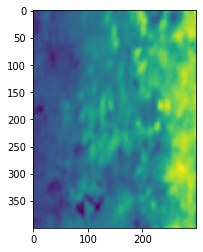

We classify this as not a face
10
9492.379767635668


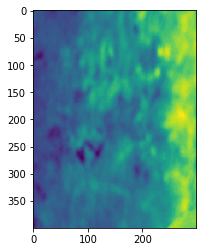

We classify this as not a face
23
9566.538876145965


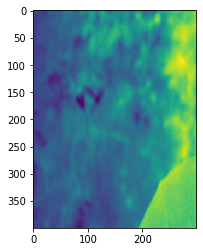

We classify this as not a face
23
8906.392469717946


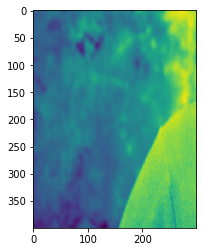

We classify this as not a face
10
10702.92414452545


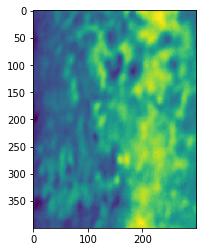

We classify this as not a face
10
10338.271416294301


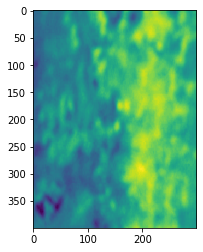

We classify this as not a face
10
10882.974048494116


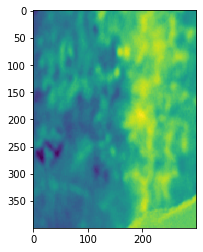

We classify this as not a face
10
10526.511326517644


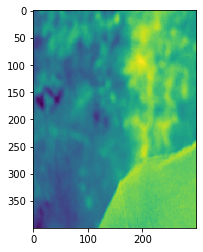

We classify this as not a face
10
9960.740459296758


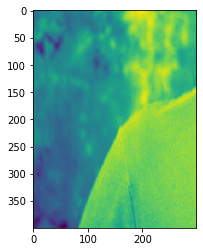

We classify this as not a face
10
11401.31393943286


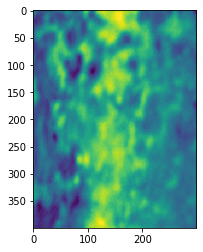

We classify this as not a face
10
11161.649645338564


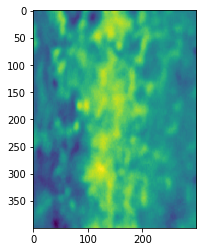

We classify this as not a face
10
10816.776262697844


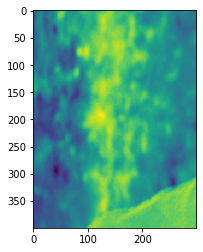

We classify this as not a face
10
10868.36813986428


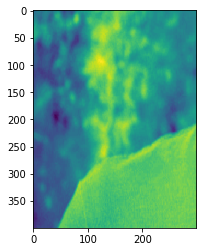

We classify this as not a face
10
11138.667709598


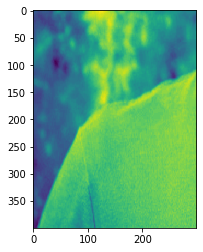

We classify this as not a face
10
10527.57830673092


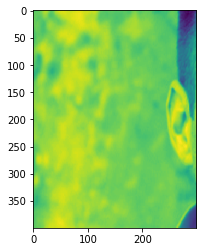

We classify this as not a face
10
12318.907911499426


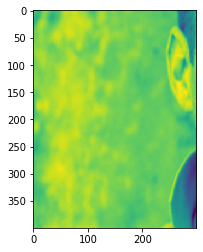

We classify this as not a face
10
11814.046471577552


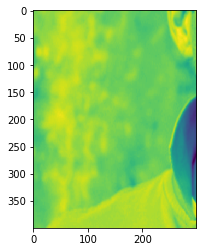

We classify this as not a face
10
11630.196245147616


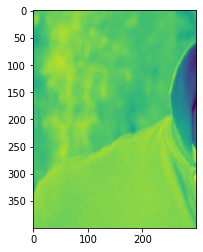

We classify this as not a face
10
11522.027591415963


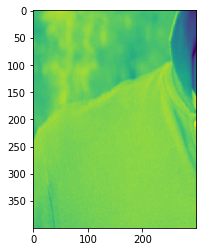

We classify this as not a face
10
10400.17639420675


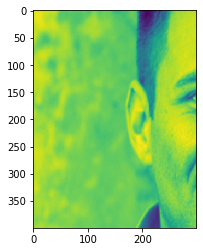

We classify this as not a face
10
10633.161248443097


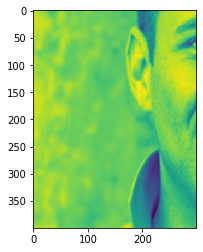

We classify this as not a face
10
11831.13558438354


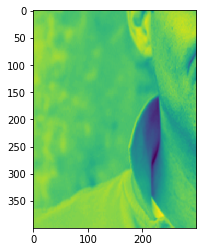

We classify this as not a face
10
10489.655679752223


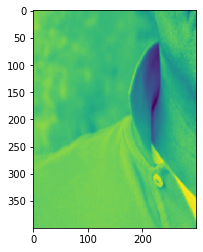

We classify this as not a face
10
9307.807979946481


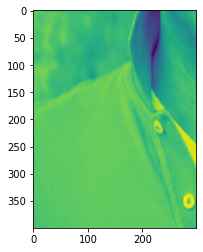

We classify this as not a face
10
8976.451542031225


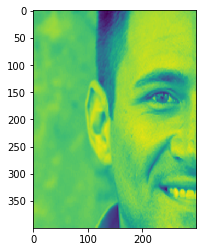

We classify this as not a face
10
8687.453362001852


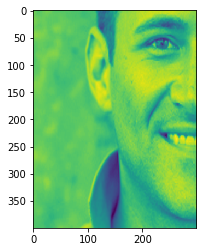

We classify this as a face
8
12083.751641881205


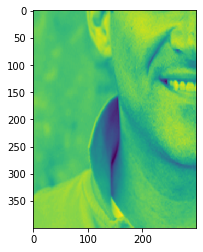

We classify this as not a face
10
11539.815727732366


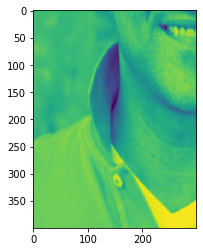

We classify this as not a face
10
9558.073547877802


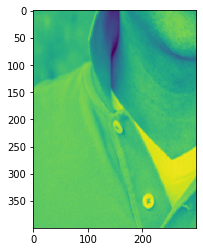

We classify this as not a face
10
9870.498196998698


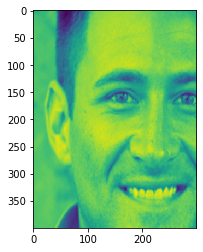

We classify this as not a face
10
7926.8105712811175


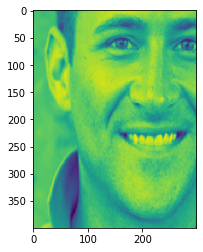

We classify this as a face
10
11448.392001046619


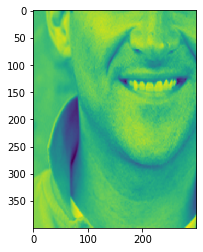

We classify this as not a face
10
10291.38027960756


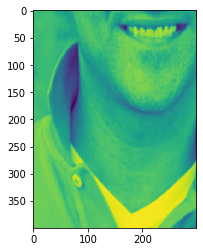

We classify this as not a face
10
8776.642238556266


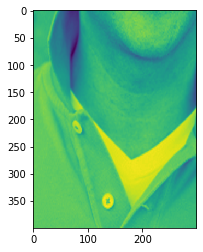

We classify this as a face
10
9996.751895439013


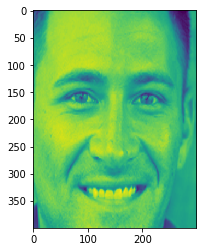

We classify this as not a face
10
6890.394541498102


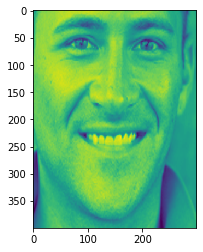

We classify this as a face
8
8893.258160657631


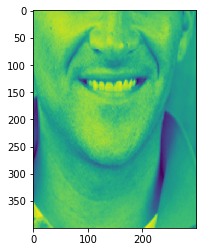

We classify this as not a face
8
8084.696037101231


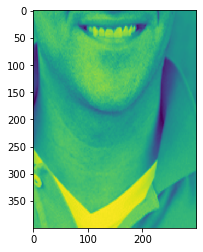

We classify this as a face
10
7792.529208637303


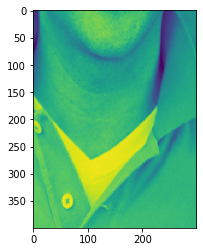

We classify this as a face
10
9217.88915845908


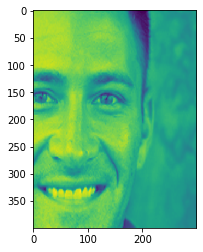

We classify this as not a face
10
6933.705588009147


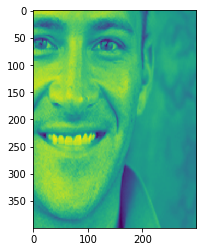

We classify this as a face
10
9635.484894751977


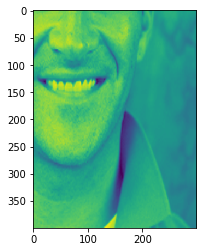

We classify this as not a face
8
9238.998696264687


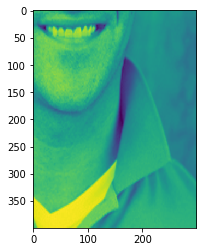

We classify this as not a face
10
7759.7563593233235


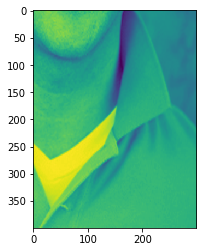

We classify this as a face
14
8802.300113922103


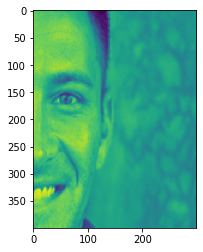

We classify this as not a face
14
8620.854687687206


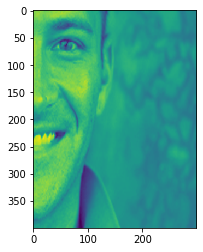

We classify this as a face
4
8762.653416776571


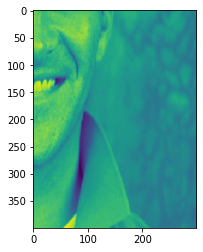

We classify this as a face
14
9998.269993003545


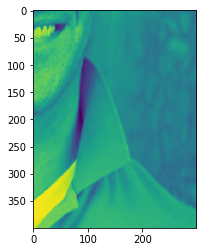

We classify this as not a face
14
6958.495689710378


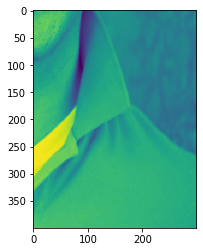

We classify this as a face


In [18]:
img2 = full_img['one_man.jpg']
plt.imshow(img2)
plt.show()

img_w = 150
img_h = 150
boxes = []
for i in range(0,img2.width,int(img_w/4)):
    for j in range(0,img2.height//2,int(img_h/4)):
        right = min((i+img_w),img2.width)
        upper = j
        left = i
        lower = min((j + img_h),img.height)
        if right - left < img_w or lower-upper < img_h:
            continue
        bbox = (left,upper,right,lower)
        crop = img2.crop(bbox).resize((width,height)).convert('L')
        #print(bbox)
#         plt.imshow(crop)
#         plt.show()
        if facial_detection(crop):
            boxes.append([left,right,upper,lower])

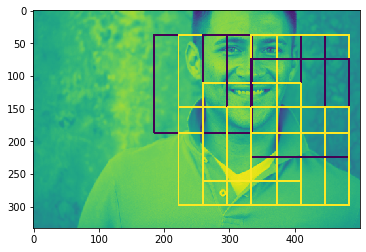

In [19]:
temp_img = img2
for i in range(len(boxes)):
    if(boxes[i] == None):
        continue
    start_point = (boxes[i][0], boxes[i][2]) 

    # represents the bottom right corner of rectangle 
    end_point = (boxes[i][1], boxes[i][3]) 

    # Blue color in BGR 
    color = (255*(i%3), 255*(i+1%3),255*(i+2%3)) 

    # Line thickness of 2 px 
    thickness = 2

    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    np_img = np.asarray(temp_img)
    image = cv2.rectangle(np_img, start_point, end_point, color, thickness) 
    temp_img = Image.fromarray(image)
plt.imshow(image)
plt.show()
